In [1]:
import os
import h5py
import numpy as np
from brainspace.gradient import GradientMaps
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plot_funcs

### fdr correction

In [2]:
def FDR_sofie(p, q):
    # p : 1D np array, vector of p-values
    # q : float, false discovery rate level
    p = np.sort(p)
    V = len(p)
    I = np.arange(1,V+1)

    cVID = 1
    cVN  = (1 / np.arange(1,V+1)).sum()

    pID  = p[np.max(np.where(p <= (I / V*q / cVID)))]
    pN   = np.where(p <= (I / V*q / cVN))
    
    return pID, pN

### get solar results in data frame

In [3]:
fname = '../solar/solar_msm50_t1t2_lsub/t1t2_LSUB_results_herit.txt'

t1t2_lsub_herit = pd.read_csv(fname,
                              index_col = 0,
                              header = 0)

t1t2_lsub_herit.index.name = 'node'

In [8]:
#t1t2_lsub_herit

### reordering node indices

In [4]:
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))

node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [5]:
df_t1t2_lsub_herit = pd.DataFrame(index = node_str,
                               columns = ['H2r', 'rp'])

In [6]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = t1t2_lsub_herit.index.get_loc(nodeID)
    iB = df_t1t2_lsub_herit.index.get_loc(nodeID)

    df_t1t2_lsub_herit.iloc[iB]['H2r'] = t1t2_lsub_herit.iloc[iA]['H2r']
    df_t1t2_lsub_herit.iloc[iB]['rp']  = t1t2_lsub_herit.iloc[iA]['rp']


In [7]:
#df_t1t2_lsub_herit

In [8]:
data = np.array(df_t1t2_lsub_herit['rp'], dtype = 'float')

p = np.array(df_t1t2_lsub_herit['rp'], dtype = 'float')

q = 0.05

pID, pN = FDR_sofie(p, q)

pID

0.0347893

In [9]:
len(np.where(data <= pID)[0])

1024

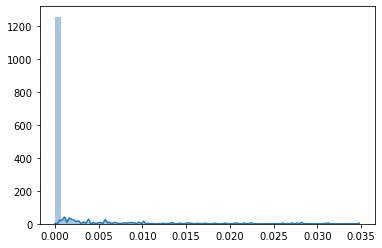

In [10]:
sns.distplot(data)

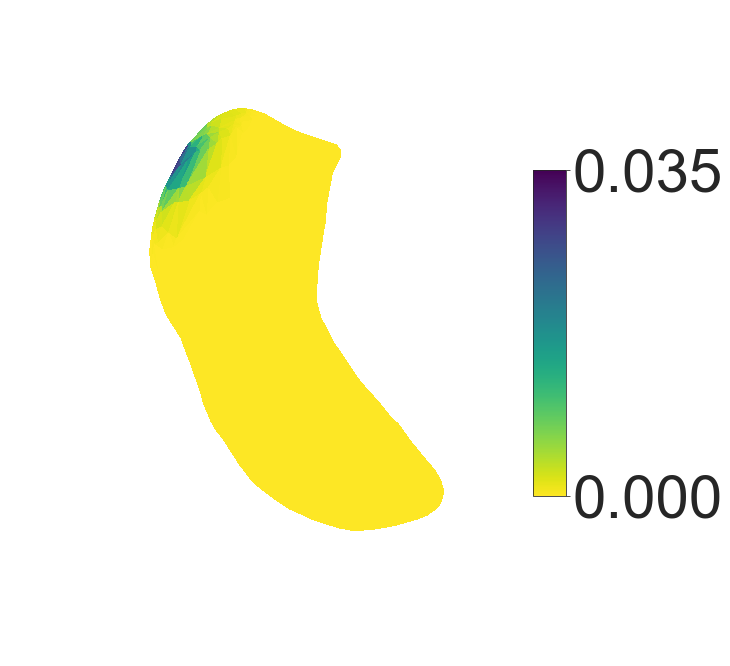

In [13]:
data = np.array(df_t1t2_lsub_herit['rp'], dtype = 'float')

fig = plot_funcs.plot_surf_upper3(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  data,
                                  'viridis_r',
                                  0, pID)

#fig.savefig('../figures/herit_pvals_t1t2_lsub_msm5_fdr.png',
#            format='png',dpi=300)

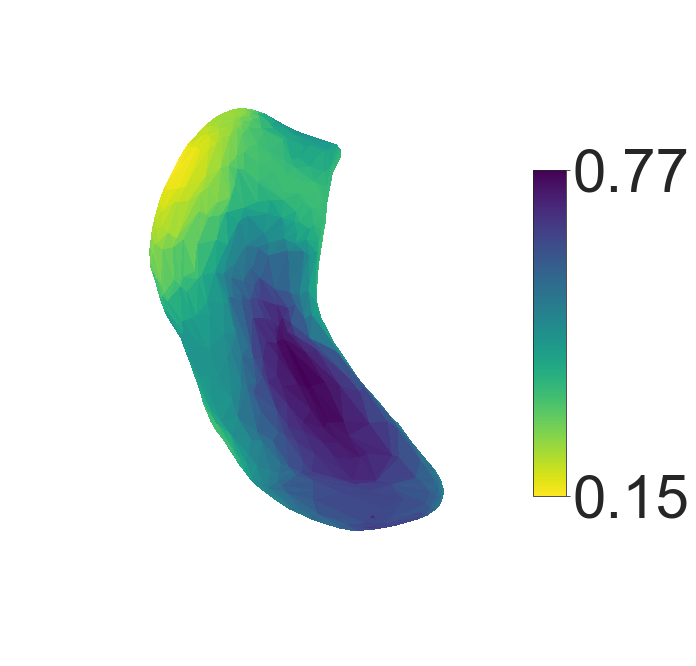

In [14]:
data = np.array(df_t1t2_lsub_herit['H2r'], dtype = 'float')


fig = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  data,
                                  'viridis_r',
                                  data.min(), data.max())

#fig.savefig('../herit_pvals_t1t2_lsub_msm5_H2r.png',
#            format='png',dpi=300)


In [15]:
data.min(), data.max()

(0.15353989999999998, 0.7679011)

### LCA

In [16]:
fname = '../solar/solar_msm50_t1t2_lca/t1t2_LCA_results_herit.txt'

t1t2_lca_herit = pd.read_csv(fname,
                             index_col = 0,
                             header = 0)
t1t2_lca_herit.index.name = 'node'

In [17]:
#t1t2_lca_herit

In [18]:
tot_node_num_lsub = 2048
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

2048


(1, '...', 2048)

In [19]:
df_t1t2_lca_herit = pd.DataFrame(index = node_str,
                                 columns = ['H2r', 'rp'])

In [20]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = t1t2_lca_herit.index.get_loc(nodeID)
    iB = df_t1t2_lca_herit.index.get_loc(nodeID)

    df_t1t2_lca_herit.iloc[iB]['H2r'] = t1t2_lca_herit.iloc[iA]['H2r']
    df_t1t2_lca_herit.iloc[iB]['rp']  = t1t2_lca_herit.iloc[iA]['rp']


In [21]:
#df_t1t2_lca_herit

In [22]:
data = np.array(df_t1t2_lca_herit['rp'], dtype = 'float')

p = data

q = 0.05

pID, pN = FDR_sofie(p, q)

pID

0.047305400000000004

In [23]:
len(np.where(data <= pID)[0])

2035

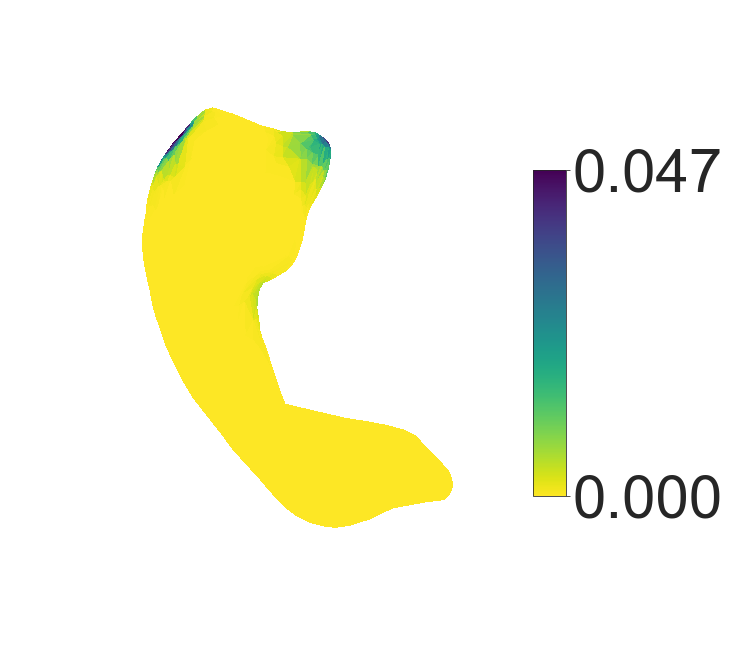

In [24]:

fig = plot_funcs.plot_surf_upper3(plot_funcs.xLCA, 
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  data,
                                  'viridis_r',
                                  0, pID)


#fig.savefig('../figures/herit_pvals_t1t2_lca_msm5_fdr.png',
#            format='png',dpi=300)

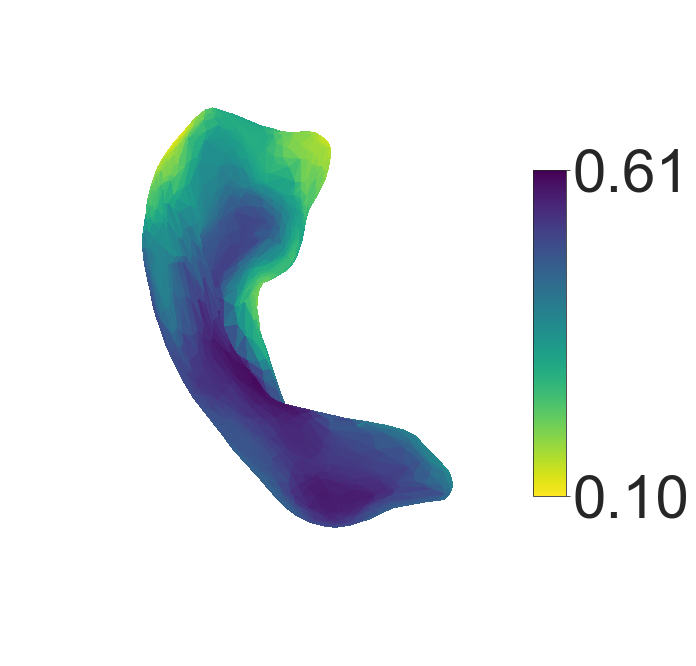

In [25]:
data = np.array(df_t1t2_lca_herit['H2r'], dtype = 'float')

fig = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  data,
                                  'viridis_r',
                                  data.min(), data.max())

#fig.savefig('../figures/herit_pvals_t1t2_lca_msm5_H2r.png',
#            format='png',dpi=300)


### LDG

In [28]:
fname = '../solar/solar_msm50_t1t2_ldg/t1t2_LDG_results_herit.txt'

t1t2_ldg_herit = pd.read_csv(fname,
                             index_col = 0,
                             header = 0)

t1t2_ldg_herit.index.name = 'node'


In [29]:
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [30]:
df_t1t2_ldg_herit = pd.DataFrame(index = node_str,
                                 columns = ['H2r', 'rp'])

In [31]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = t1t2_ldg_herit.index.get_loc(nodeID)
    iB = df_t1t2_ldg_herit.index.get_loc(nodeID)

    df_t1t2_ldg_herit.iloc[iB]['H2r'] = t1t2_ldg_herit.iloc[iA]['H2r']
    df_t1t2_ldg_herit.iloc[iB]['rp']  = t1t2_ldg_herit.iloc[iA]['rp']


In [32]:
#df_t1t2_ldg_herit

In [33]:
data = np.array(df_t1t2_ldg_herit['rp'], dtype = 'float')

p = data

q = 0.05

pID, pN = FDR_sofie(p, q)

pID

0.0017930999999999997

In [34]:
len(np.where(data < pID)[0])

1023

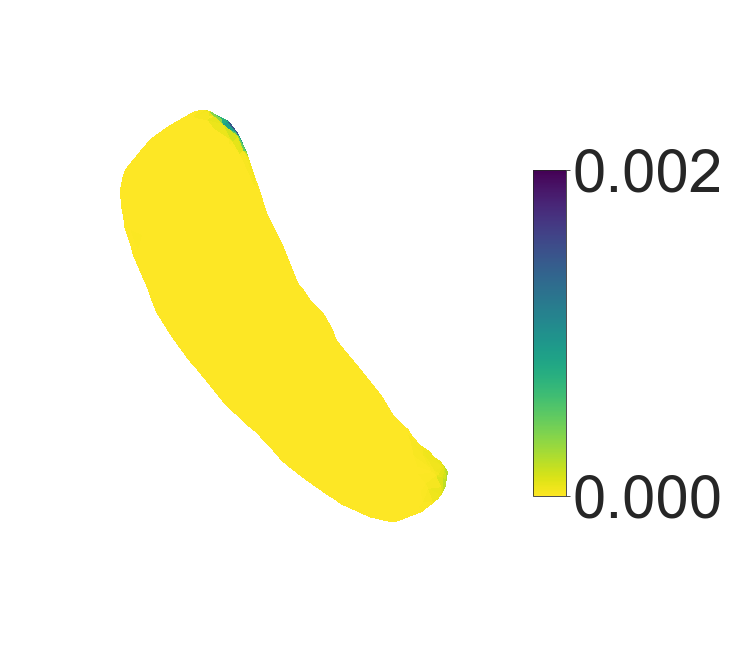

In [35]:
fig = plot_funcs.plot_surf_upper3(plot_funcs.xLDG, 
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  data,
                                  'viridis_r',
                                  0, pID)


#fig.savefig('../figures/herit_pvals_t1t2_ldg_msm5_fdr.png',
#            format='png',dpi=300)


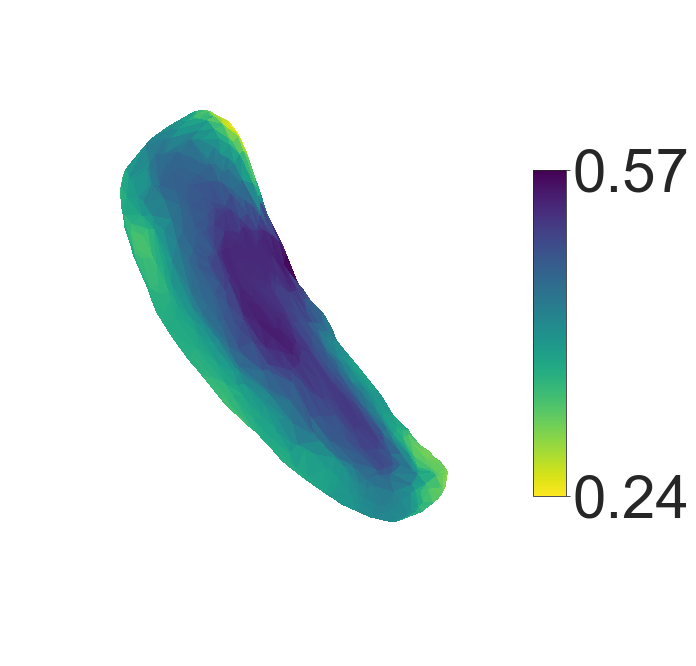

In [39]:
data = np.array(df_t1t2_ldg_herit['H2r'], dtype = 'float')

fig = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  data,
                                  'viridis_r',
                                  data.min(), data.max())

#fig.savefig('../figures/herit_pvals_t1t2_ldg_msm5_H2r.png',
#            format='png',dpi=300)


### R_SUB

In [40]:
fname = '../solar/solar_msm50_t1t2_rsub/t1t2_RSUB_results_herit.txt'

t1t2_rsub_herit = pd.read_csv(fname,
                              index_col = 0,
                              header = 0)

t1t2_rsub_herit.index.name = 'node'

In [41]:
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [42]:
df_t1t2_rsub_herit = pd.DataFrame(index = node_str,
                                  columns = ['H2r', 'rp'])

In [43]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = t1t2_rsub_herit.index.get_loc(nodeID)
    iB = df_t1t2_rsub_herit.index.get_loc(nodeID)

    df_t1t2_rsub_herit.iloc[iB]['H2r'] = t1t2_rsub_herit.iloc[iA]['H2r']
    df_t1t2_rsub_herit.iloc[iB]['rp']  = t1t2_rsub_herit.iloc[iA]['rp']


In [44]:
data = np.array(df_t1t2_rsub_herit['rp'], dtype = 'float')

p = data

q = 0.05

pID, pN = FDR_sofie(p, q)

pID

0.0038968

In [45]:
len(np.where(data < pID)[0])

1023

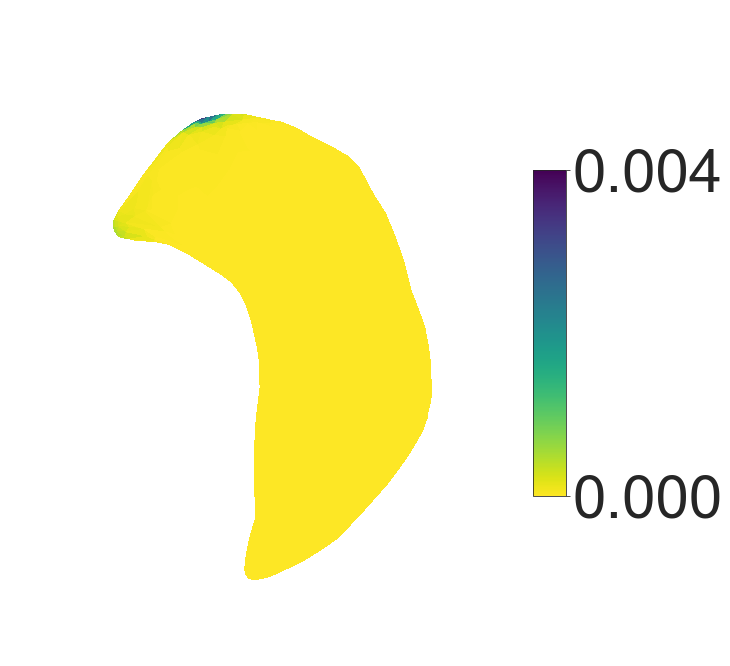

In [47]:
data = np.array(df_t1t2_rsub_herit['rp'], dtype = 'float')

fig = plot_funcs.plot_surf_upper3(plot_funcs.xRSUB, 
                                  plot_funcs.yRSUB, 
                                  plot_funcs.zRSUB, 
                                  plot_funcs.triRSUB, 
                                  data,
                                  'viridis_r',
                                  0, pID)

#fig.savefig('../figures/herit_pvals_t1t2_rsub_msm5_fdr.png',
#            format='png',dpi=300)


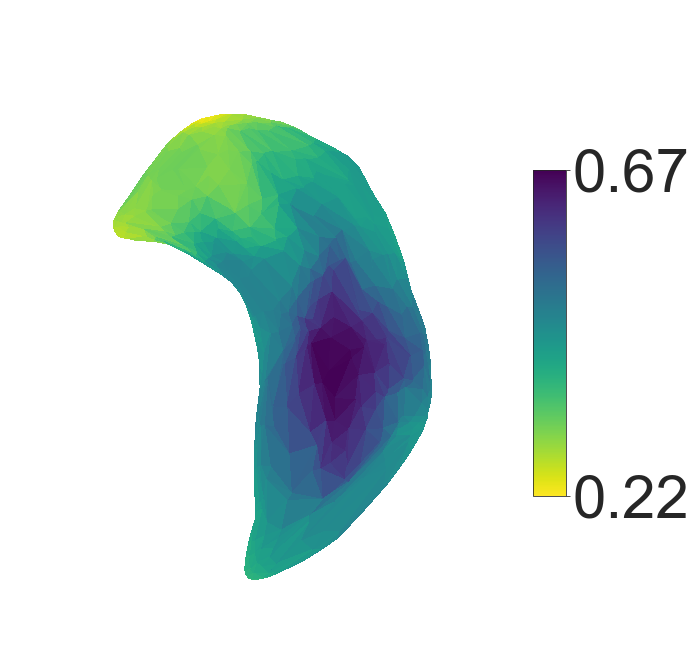

In [49]:
data = np.array(df_t1t2_rsub_herit['H2r'], dtype = 'float')

fig = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                  plot_funcs.yRSUB, 
                                  plot_funcs.zRSUB, 
                                  plot_funcs.triRSUB, 
                                  data,
                                  'viridis_r',
                                  data.min(), data.max())

#fig.savefig('../figures/herit_pvals_t1t2_rsub_msm5_H2r.png',
#            format='png',dpi=300)


### RCA

In [50]:
fname = '../solar/solar_msm50_t1t2_rca/t1t2_RCA_results_herit.txt'

t1t2_rca_herit = pd.read_csv(fname,
                             index_col = 0,
                             header = 0)

t1t2_rca_herit.index.name = 'node'

In [51]:
tot_node_num_lsub = 2048
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

2048


(1, '...', 2048)

In [52]:
df_t1t2_rca_herit = pd.DataFrame(index = node_str,
                                  columns = ['H2r', 'rp'])

In [53]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = t1t2_rca_herit.index.get_loc(nodeID)
    iB = df_t1t2_rca_herit.index.get_loc(nodeID)

    df_t1t2_rca_herit.iloc[iB]['H2r'] = t1t2_rca_herit.iloc[iA]['H2r']
    df_t1t2_rca_herit.iloc[iB]['rp']  = t1t2_rca_herit.iloc[iA]['rp']


In [54]:
data = np.array(df_t1t2_rca_herit['rp'], dtype = 'float')

p = data

q = 0.05

pID, pN = FDR_sofie(p, q)

pID

0.0469791

In [55]:
len(np.where(data < pID)[0])

2024

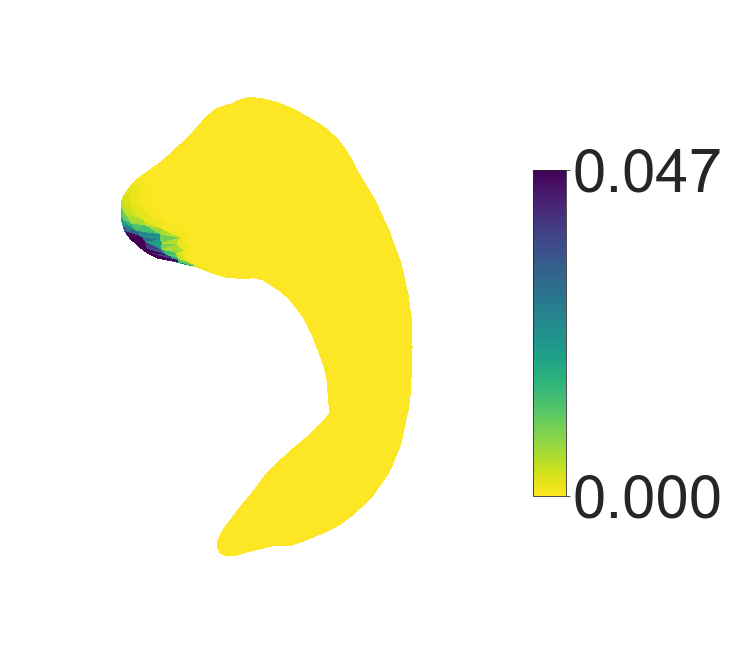

In [56]:
data = np.array(df_t1t2_rca_herit['rp'], dtype = 'float')

fig = plot_funcs.plot_surf_upper3(plot_funcs.xRCA, 
                                  plot_funcs.yRCA, 
                                  plot_funcs.zRCA, 
                                  plot_funcs.triRCA, 
                                  data,
                                  'viridis_r',
                                  0, pID)

#fig.savefig(../figures/herit_pvals_t1t2_rca_msm5_fdr.png',
#            format='png',dpi=300)


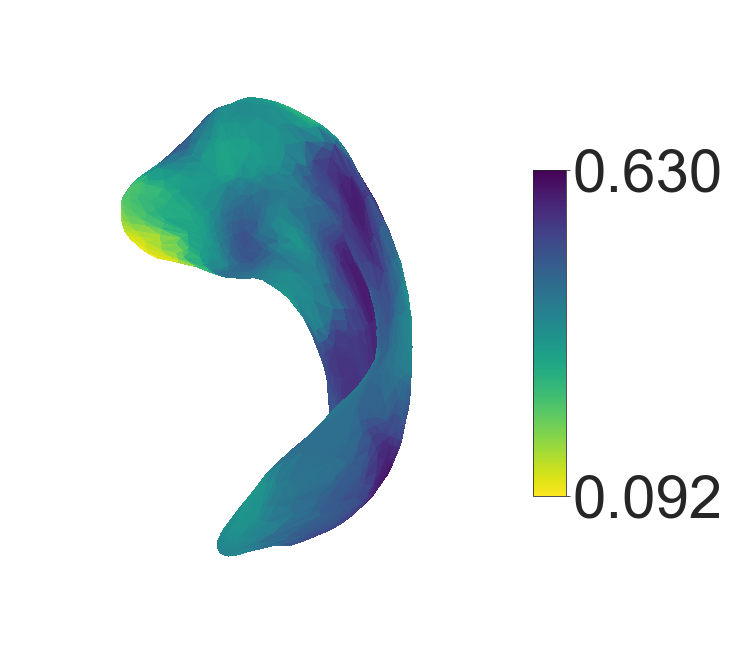

In [57]:
data = np.array(df_t1t2_rca_herit['H2r'], dtype = 'float')

fig = plot_funcs.plot_surf_upper3(plot_funcs.xRCA, 
                                  plot_funcs.yRCA, 
                                  plot_funcs.zRCA, 
                                  plot_funcs.triRCA, 
                                  data,
                                  'viridis_r',
                                  data.min(), data.max())

#fig.savefig('../figures/herit_pvals_t1t2_rca_msm5_H2r.png',
#            format='png',dpi=300)


### RDG

In [58]:
fname = '../solar/solar_msm50_t1t2_rdg/t1t2_RDG_results_herit.txt'

t1t2_rdg_herit = pd.read_csv(fname,
                             index_col = 0,
                             header = 0)

t1t2_rdg_herit.index.name = 'node'



In [59]:
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [60]:
df_t1t2_rdg_herit = pd.DataFrame(index = node_str,
                                 columns = ['H2r', 'rp'])

In [61]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = t1t2_rdg_herit.index.get_loc(nodeID)
    iB = df_t1t2_rdg_herit.index.get_loc(nodeID)

    df_t1t2_rdg_herit.iloc[iB]['H2r'] = t1t2_rdg_herit.iloc[iA]['H2r']
    df_t1t2_rdg_herit.iloc[iB]['rp']  = t1t2_rdg_herit.iloc[iA]['rp']


In [62]:
data = np.array(df_t1t2_rdg_herit['rp'], dtype = 'float')

p = data

q = 0.05

pID, pN = FDR_sofie(p, q)

pID

5.479999999999999e-05

In [63]:
len(np.where(data < pID)[0])

1023

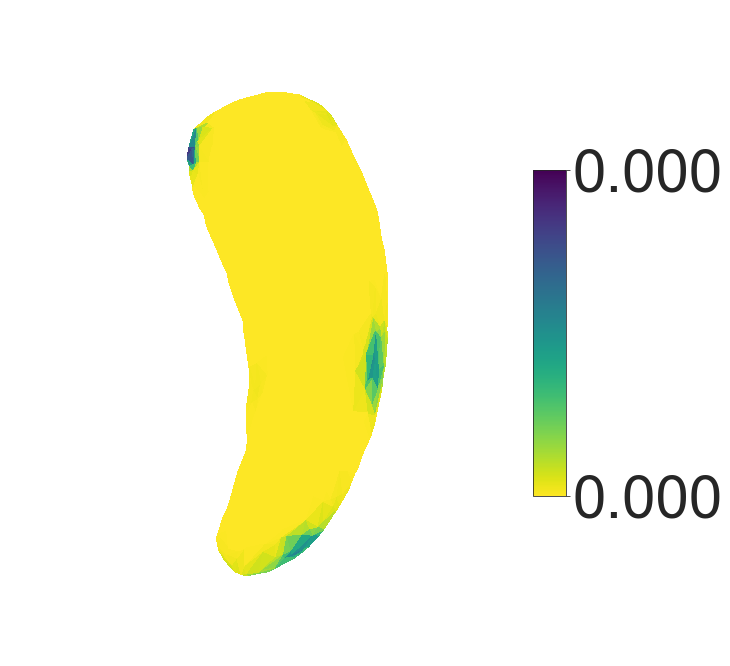

In [64]:
data = np.array(df_t1t2_rdg_herit['rp'], dtype = 'float')

fig = plot_funcs.plot_surf_upper3(plot_funcs.xRDG, 
                                  plot_funcs.yRDG, 
                                  plot_funcs.zRDG, 
                                  plot_funcs.triRDG, 
                                  data,
                                  'viridis_r',
                                  0, pID)

#fig.savefig('../figures/herit_pvals_t1t2_rdg_msm5_fdr.png',
#            format='png',dpi=300)


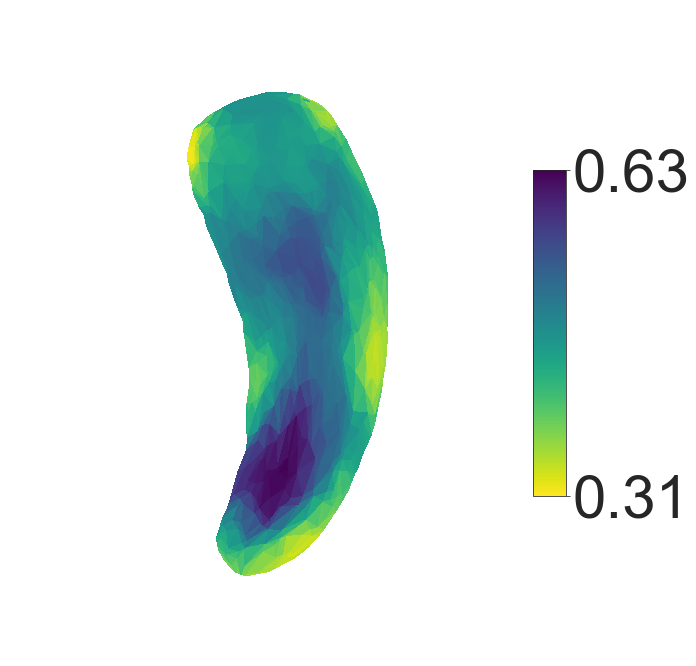

In [65]:
data = np.array(df_t1t2_rdg_herit['H2r'], dtype = 'float')

fig = plot_funcs.plot_surf_upper2(plot_funcs.xRDG, 
                                  plot_funcs.yRDG, 
                                  plot_funcs.zRDG, 
                                  plot_funcs.triRDG, 
                                  data,
                                  'viridis_r',
                                  data.min(), data.max())


#fig.savefig('../figures/herit_pvals_t1t2_rdg_msm5_H2r.png',
#            format='png',dpi=300)
